# Atividade 1: Composição Matricial e Determinantes

**Disciplina:** Matemática Computacional  
**Aluno:** Alessandro Reali Lopes Silva

### Este notebook explora a multiplicação de matrizes como composição de transformações lineares, analisando propriedades geométricas e algébricas.

#### O trabalho está estruturado para atender aos seguintes requisitos:
1.  **Composição de Transformações:** Implementar uma **Rotação horária de 90°** seguida de um **Cisalhamento (shear) em x**.
2.  **Determinantes:** Analisar visualmente e numericamente a conservação (ou alteração) da área através do valor do determinante.
3.  **Matriz Composta:** Demonstrar que aplicar as transformações sequencialmente é equivalente a aplicar uma única matriz resultante do produto $M = S \cdot R$.
4.  **Não-Comutatividade:** Inverter a ordem das transformações para demonstrar que a ordem dos fatores altera o produto final ($A \cdot B \neq B \cdot A$).
5.  **Produto Escalar:** Realizar uma transformação para obter vetores ortogonais e validar a perpendicularidade através do produto escalar ($\vec{u} \cdot \vec{v}$).

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Configuração para que os gráficos do matplotlib apareçam inline
%matplotlib inline

# Uma função helper para desenhar os vetores
def plotar_vetores(
        titulo: str,
        vetores: np.ndarray,
        cores: list = None,
        labels: list = None
    ) -> None:
    """
    Plota vetores 2D a partir da origem (0,0) usando matplotlib.

    Parâmetros
    ----------
    titulo : str
        Texto exibido como título do gráfico.
    vetores : np.ndarray, shape (n, 2) ou (2,)
        Array onde cada linha representa um vetor 2D [x, y]. Para um único vetor também aceita shape (2,).
    cores : list ou str, opcional
        Lista de cores (len == n) ou uma única cor aplicada a todos os vetores.
        Se None, usa 'black' para todos.
    labels : list, opcional
        Lista de rótulos para cada vetor. Se fornecido, a legenda será exibida.
    """
    # Garantir que vetores seja uma matriz 2D
    vetores = np.atleast_2d(vetores)
    n = len(vetores)

    # Define uma cor padrão (preto) se nenhuma for passada
    if cores is None:
        cores = ['black'] * n

    # Define um rótulo padrão (vazio) se nenhum for passado
    if labels is None:
        labels = [None] * n

    # Configurar o gráfico
    plt.figure()
    plt.axhline(0, c='black', lw=0.8)
    plt.axvline(0, c='black', lw=0.8)
    plt.grid(
        visible=True,
        color='gray',
        linestyle='dashed',
        linewidth=0.5,
        alpha=0.4
    )
    
    # Desenhar cada vetor
    for i in range(len(vetores)):
        vetor_x, vetor_y = vetores[i]
        origem_x, origem_y = (0, 0)
        plt.quiver(
            origem_x, origem_y, vetor_x, vetor_y,
            angles='xy', scale_units='xy', scale=1,
            color=cores[i],
            label=labels[i]
        )
    
    # Definir limites dos eixos
    max_val = np.max(np.abs(vetores)) * 1.5
    if max_val == 0:
        max_val = 1  # Evitar limites zero
    plt.xlim([-max_val, max_val])
    plt.ylim([-max_val, max_val])
    
    # Definir ticks nos eixos
    tick_limit = np.ceil(max_val)
    ticks = np.arange(-tick_limit, tick_limit + 1, 1)
    plt.xticks(ticks)
    plt.yticks(ticks)

    # Manter proporção igual nos eixos
    plt.gca().set_aspect('equal', adjustable='box')

    # Adicionar título
    plt.title(titulo)

    # Se foram passados rótulos, mostrar a legenda
    if labels[0] is not None:
        plt.legend()
    
    # Exibir o gráfico
    plt.show()

def vetor_para_latex(nome_vetor: str, vetor: np.ndarray) -> str:
    """
    Converte um vetor 2D em uma representação LaTeX.
    """
    return f"$\\vec{{{nome_vetor}}}$ = $\\begin{{bmatrix}} {" \\\\ ".join(map(lambda x: "%g" % x, vetor))} \\end{{bmatrix}}$"

def matriz_para_latex(nome_matriz: str, matriz: np.ndarray) -> str:
    """
    Converte uma matriz 2x2 em uma representação LaTeX.
    """
    return f"${nome_matriz}$ = $\\begin{{bmatrix}} {"\\\\".join(" & ".join(map(lambda x: "%g" % x, linha)) for linha in matriz)} \\end{{bmatrix}}$"

def plotar_paralelogramo(
        ax: plt.Axes,
        v1: np.ndarray,
        v2: np.ndarray,
        cor: str = 'blue',
        alpha: float = 0.2,
        label: str = None
    ):
    """
    Desenha o paralelogramo definido pelos vetores v1 e v2.
    """
    # Define os 4 vértices do paralelogramo
    origem = np.array([0, 0])
    soma = v1 + v2
    
    # Coordenadas X e Y dos vértices em ordem
    xs = [origem[0], v1[0], soma[0], v2[0]]
    ys = [origem[1], v1[1], soma[1], v2[1]]
    
    # Pinta a área
    ax.fill(xs, ys, color=cor, alpha=alpha, label=label)

def plotar_comparacao(
    v_orig: np.ndarray,
    v_res_1: np.ndarray,
    titulo_1: str,
    v_res_2: np.ndarray,
    titulo_2: str
) -> None:
    """
    Plota dois gráficos lado a lado para comparar transformações.
    v_orig: Vetor original (array numpy)
    v_res_1: Resultado da transformação 1
    v_res_2: Resultado da transformação 2
    """
    
    # Cria uma figura com 1 linha e 2 colunas
    figura, colunas = plt.subplots(1, 2, figsize=(12, 5))
    
    configuracoes = [
        # Configurações para o gráfico da esquerda
        (colunas[0], v_res_1, titulo_1, 'blue'),
        # Configurações para o gráfico da direita
        (colunas[1], v_res_2, titulo_2, 'red')
    ]

    for coluna, v_res, titulo, cor in configuracoes:
        # Configuração do Grid e Eixos
        coluna.grid(True, linestyle=':', alpha=0.6)
        coluna.axhline(0, color='black', linewidth=1)
        coluna.axvline(0, color='black', linewidth=1)
        coluna.set_title(titulo)
        
        # Define limites fixos para garantir que a escala visual seja a mesma
        coluna.set_xlim(-5, 5)
        coluna.set_ylim(-5, 5)

        # Plota o vetor Original (sempre cinza/pontilhado para referência)
        coluna.quiver(0, 0, v_orig[0], v_orig[1], angles='xy', scale_units='xy', scale=1, color='gray', alpha=0.5, label='Original')
        
        # Plota o vetor Resultante
        coluna.quiver(0, 0, v_res[0], v_res[1], angles='xy', scale_units='xy', scale=1, color=cor, label='Transformado')
        
        coluna.legend()

    plt.tight_layout()
    plt.show()

## 1. Composição de Transformações (Rotação + Cisalhamento)

**Resumo:** Esta etapa consiste em aplicar duas transformações lineares de forma sequencial sobre um vetor. Primeiro, aplicaremos uma **rotação de 90° no sentido horário** e, ao vetor resultante, aplicaremos um **cisalhamento (shear) na direção x**.

**Como será trabalhado:**
1.  Definir um vetor original $\vec{v}$.
2.  Definir a matriz de Rotação $R$ e a matriz de Cisalhamento $S$.
3.  Calcular o vetor rotacionado: $\vec{v'} = R \cdot \vec{v}$.
4.  Calcular o vetor final (após cisalhamento): $\vec{v''} = S \cdot \vec{v'}$.
5.  Visualizar os vetores em cada etapa para entender a transformação geométrica.

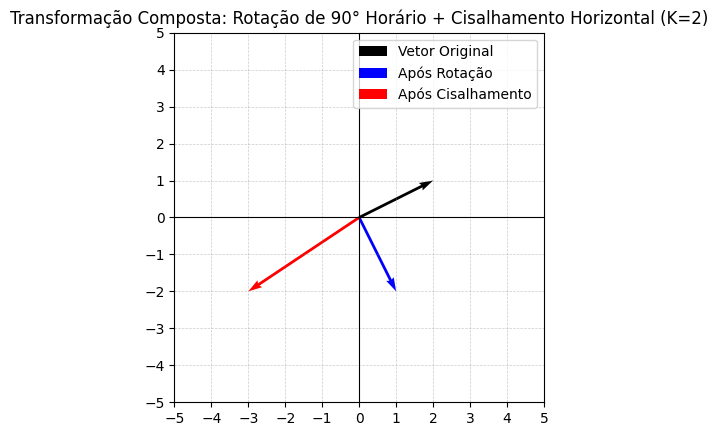

In [17]:
# Vetor original para teste
v_original = np.array([2, 1])

# Matriz de Rotação de 90° no sentido horário
Rotacao_90_horario = np.array([
    [0, 1],
    [-1, 0]
])

# Fator de cisalhamento
K = 2
# Matriz de Cisalhamento na direção x
Cisalhamento_x_K = np.array([
    [1, K],
    [0, 1]
])

# Aplicar as transformações sequencialmente
v_rotacionado = Rotacao_90_horario @ v_original
v_final = Cisalhamento_x_K @ v_rotacionado

# Plotar os vetores em cada etapa
plotar_vetores(
    titulo=f"Transformação Composta: Rotação de 90° Horário + Cisalhamento Horizontal (K={K})",
    vetores=np.array([v_original, v_rotacionado, v_final]),
    cores=['black', 'blue', 'red'],
    labels=['Vetor Original', 'Após Rotação', 'Após Cisalhamento']
)

## 2. Análise de Determinantes

**Resumo:** Analisar como a área de uma forma geométrica (representada por vetores) é alterada por transformações lineares. O determinante da matriz de transformação nos diz exatamente o fator de escala dessa mudança de área.

**Como será trabalhado:**
1.  Definir dois vetores que formam um paralelogramo.
2.  Calcular a área original do paralelogramo.
3.  Aplicar as matrizes de Rotação ($R$), Cisalhamento ($S$) e a Composta ($M = S \cdot R$).
4.  Calcular a área do paralelogramo transformado em cada caso.
5.  Comparar a mudança na área com o determinante de cada matriz.

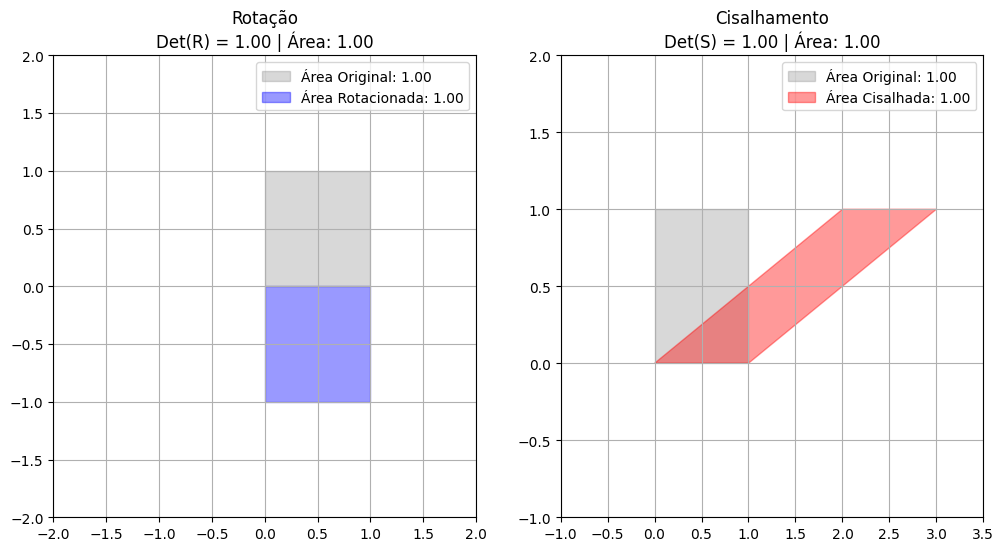


**Análise:**
- **Rotação:** O determinante da matriz de rotação é **1.0**. Isso significa que a área do objeto não muda, apenas sua orientação. A área original era 1.0 e a área após a rotação é **1.0**.
- **Cisalhamento:** O determinante da matriz de cisalhamento é **1.0**. Isso também preserva a área. A área original era 1.0 e a área após o cisalhamento é **1.0**.


In [18]:
# Vetores que definem o paralelogramo original
i = np.array([1, 0])
j = np.array([0, 1])

# Área original (determinante da matriz identidade, formada por i e j)
area_original = np.linalg.det(np.array([i, j]).T)

# Aplicar Rotação
i_rot = Rotacao_90_horario @ i
j_rot = Rotacao_90_horario @ j
area_rot = np.linalg.det(np.array([i_rot, j_rot]).T)
det_R = np.linalg.det(Rotacao_90_horario)

# Aplicar Cisalhamento
i_cis = Cisalhamento_x_K @ i
j_cis = Cisalhamento_x_K @ j
area_cis = np.linalg.det(np.array([i_cis, j_cis]).T)
det_S = np.linalg.det(Cisalhamento_x_K)

# --- Plotagem e Análise ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1: Rotação
ax1.set_title(f"Rotação\nDet(R) = {det_R:.2f} | Área: {area_rot:.2f}")
plotar_paralelogramo(ax1, i, j, cor='gray', alpha=0.3, label=f'Área Original: {area_original:.2f}')
plotar_paralelogramo(ax1, i_rot, j_rot, cor='blue', alpha=0.4, label=f'Área Rotacionada: {area_rot:.2f}')
ax1.grid(True); ax1.legend()
ax1.set_xlim(-2, 2); ax1.set_ylim(-2, 2)

# Gráfico 2: Cisalhamento
ax2.set_title(f"Cisalhamento\nDet(S) = {det_S:.2f} | Área: {area_cis:.2f}")
plotar_paralelogramo(ax2, i, j, cor='gray', alpha=0.3, label=f'Área Original: {area_original:.2f}')
plotar_paralelogramo(ax2, i_cis, j_cis, cor='red', alpha=0.4, label=f'Área Cisalhada: {area_cis:.2f}')
ax2.grid(True); ax2.legend()
ax2.set_xlim(-1, 3.5); ax2.set_ylim(-1, 2)

plt.show()

display(Markdown(f"""
**Análise:**
- **Rotação:** O determinante da matriz de rotação é **{det_R:.1f}**. Isso significa que a área do objeto não muda, apenas sua orientação. A área original era {area_original:.1f} e a área após a rotação é **{area_rot:.1f}**.
- **Cisalhamento:** O determinante da matriz de cisalhamento é **{det_S:.1f}**. Isso também preserva a área. A área original era {area_original:.1f} e a área após o cisalhamento é **{area_cis:.1f}**.
"""))

## 3. Matriz Composta

**Resumo:** Demonstrar que a aplicação sequencial de duas transformações ($S$ e $R$) é algebricamente equivalente a aplicar uma única matriz, a **matriz composta** $M$, que é o produto das matrizes individuais ($M = S \cdot R$).

**Como será trabalhado:**
1.  Calcular a matriz composta $M = S \cdot R$.
2.  Aplicar a matriz $M$ diretamente ao vetor original $\vec{v}$ para obter $\vec{v_{comp}}$.
3.  Comparar o resultado $\vec{v_{comp}}$ com o vetor $\vec{v''}$ (obtido pela aplicação sequencial).
4.  Verificar se $\vec{v_{comp}} = \vec{v''}$.


$S$ = $\begin{bmatrix} 1 & 2\\0 & 1 \end{bmatrix}$ $\cdot$ $R$ = $\begin{bmatrix} 0 & 1\\-1 & 0 \end{bmatrix}$ = $M$ = $\begin{bmatrix} -2 & 1\\-1 & 0 \end{bmatrix}$



$S$ = $\begin{bmatrix} 1 & 2\\0 & 1 \end{bmatrix}$ $\cdot$ $R$ = $\begin{bmatrix} 0 & 1\\-1 & 0 \end{bmatrix}$ = $M$ = $\begin{bmatrix} -2 & 1\\-1 & 0 \end{bmatrix}$



- Vetor final (sequencial): $\vec{v''}$ = $\begin{bmatrix} -3 \\ -2 \end{bmatrix}$
- Vetor final (composta): $\vec{v_{comp}}$ = $\begin{bmatrix} -3 \\ -2 \end{bmatrix}$
- Os resultados são iguais? Resposta: **Sim**



$S$ = $\begin{bmatrix} 1 & 2\\0 & 1 \end{bmatrix}$ $\cdot$ $R$ = $\begin{bmatrix} 0 & 1\\-1 & 0 \end{bmatrix}$ = $M$ = $\begin{bmatrix} -2 & 1\\-1 & 0 \end{bmatrix}$



- Vetor final (sequencial): $\vec{v''}$ = $\begin{bmatrix} -3 \\ -2 \end{bmatrix}$
- Vetor final (composta): $\vec{v_{comp}}$ = $\begin{bmatrix} -3 \\ -2 \end{bmatrix}$
- Os resultados são iguais? Resposta: **Sim**


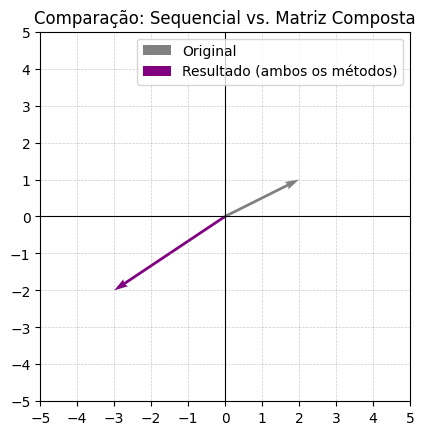

In [19]:
# Vetor original
v_original = np.array([2, 1])

# Matriz composta M = S . R
M_composta = Cisalhamento_x_K @ Rotacao_90_horario

# Aplicar a matriz composta diretamente ao vetor original
v_composto = M_composta @ v_original

# Comparar com o resultado da aplicação sequencial
sao_iguais = np.allclose(v_final, v_composto)

display(Markdown(f"""
{matriz_para_latex('S', Cisalhamento_x_K)} $\\cdot$ {matriz_para_latex('R', Rotacao_90_horario)} = {matriz_para_latex('M', M_composta)}
"""))

display(Markdown(f"""
- Vetor final (sequencial): {vetor_para_latex("v''", v_final)}
- Vetor final (composta): {vetor_para_latex("v_{comp}", v_composto)}
- Os resultados são iguais? Resposta: **{'Sim' if sao_iguais else 'Não'}**
"""))

plotar_vetores(
    titulo="Comparação: Sequencial vs. Matriz Composta",
    vetores=np.array([v_original, v_final]),
    cores=['gray', 'purple'],
    labels=['Original', 'Resultado (ambos os métodos)']
)

## 4. Não-Comutatividade da Multiplicação de Matrizes

**Resumo:** A ordem das multiplicações de matrizes importa. Vamos demonstrar que aplicar Rotação e depois Cisalhamento ($S \cdot R$) produz um resultado diferente de aplicar Cisalhamento e depois Rotação ($R \cdot S$).

**Como será trabalhado:**
1.  Calcular a transformação na ordem inversa: $\vec{v_{inv}} = (R \cdot S) \cdot \vec{v}$.
2.  Comparar o resultado $\vec{v_{inv}}$ com o vetor $\vec{v''}$ (da ordem original).
3.  Visualizar os dois resultados para confirmar que são diferentes.


- Resultado com $S \cdot R$: $\vec{v''}$ = $\begin{bmatrix} -3 \\ -2 \end{bmatrix}$
- Resultado com $R \cdot S$: $\vec{v_{inv}}$ = $\begin{bmatrix} 1 \\ -4 \end{bmatrix}$
- Os resultados são iguais? **Não**



- Resultado com $S \cdot R$: $\vec{v''}$ = $\begin{bmatrix} -3 \\ -2 \end{bmatrix}$
- Resultado com $R \cdot S$: $\vec{v_{inv}}$ = $\begin{bmatrix} 1 \\ -4 \end{bmatrix}$
- Os resultados são iguais? **Não**


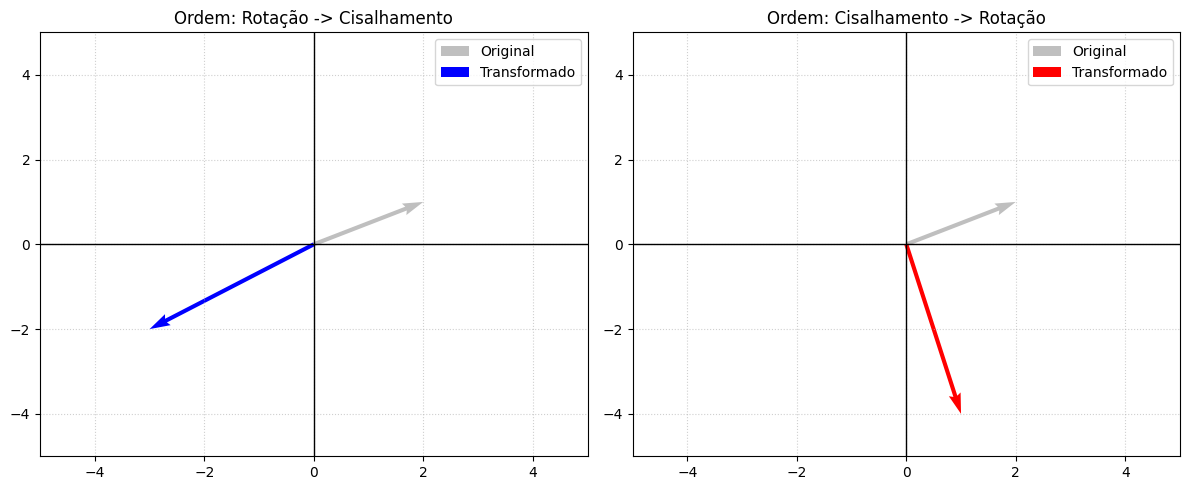

In [20]:
# Vetor original
v_original = np.array([2, 1])

# Ordem Original: M = S . R
v_ordem_original = (Cisalhamento_x_K @ Rotacao_90_horario) @ v_original

# Ordem Inversa: M' = R . S
v_ordem_inversa = (Rotacao_90_horario @ Cisalhamento_x_K) @ v_original

# Comparar os resultados
sao_iguais_inverso = np.allclose(v_ordem_original, v_ordem_inversa)

display(Markdown(f"""
- Resultado com $S \\cdot R$: {vetor_para_latex("v''", v_ordem_original)}
- Resultado com $R \\cdot S$: {vetor_para_latex("v_{inv}", v_ordem_inversa)}
- Os resultados são iguais? **{'Sim' if sao_iguais_inverso else 'Não'}**
"""))

# Plotar a comparação lado a lado
plotar_comparacao(
    v_orig=v_original,
    v_res_1=v_ordem_original,
    titulo_1="Ordem: Rotação -> Cisalhamento",
    v_res_2=v_ordem_inversa,
    titulo_2="Ordem: Cisalhamento -> Rotação"
)


## 5. Produto Escalar e Ortogonalidade

**Resumo:** O produto escalar entre dois vetores é zero se, e somente se, eles são ortogonais (perpendiculares). Vamos aplicar uma transformação a um vetor para torná-lo ortogonal a outro e validar isso com o produto escalar.

**Como será trabalhado:**
1.  Definir dois vetores, $\vec{u}$ e $\vec{v}$.
2.  Aplicar uma transformação (ex: rotação de 90°) em $\vec{v}$ para obter $\vec{v'}$.
3.  Calcular o produto escalar $\vec{u} \cdot \vec{v'}$.
4.  Verificar se o resultado é (próximo de) zero, confirmando a ortogonalidade.


- Vetor $\vec{u}$ = $\begin{bmatrix} 3 \\ 1 \end{bmatrix}$ e $\vec{v}$ = $\begin{bmatrix} -1 \\ 3 \end{bmatrix}$
- Produto escalar $\vec{u} \cdot \vec{v}$ = **0**
- Como o resultado é **zero**, os vetores são **ortogonais**.



- Vetor $\vec{u}$ = $\begin{bmatrix} 3 \\ 1 \end{bmatrix}$ e $\vec{v}$ = $\begin{bmatrix} -1 \\ 3 \end{bmatrix}$
- Produto escalar $\vec{u} \cdot \vec{v}$ = **0**
- Como o resultado é **zero**, os vetores são **ortogonais**.


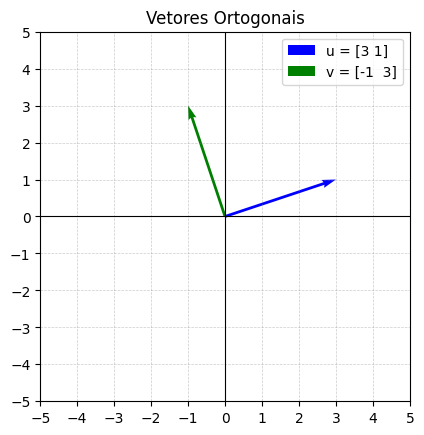


- Vetor $\vec{u}$ = $\begin{bmatrix} 3 \\ 1 \end{bmatrix}$ e $\vec{v}$ = $\begin{bmatrix} -1 \\ 3 \end{bmatrix}$
- Produto escalar $\vec{u} \cdot \vec{v}$ = **0**
- Como o resultado é **zero**, os vetores são **ortogonais**.


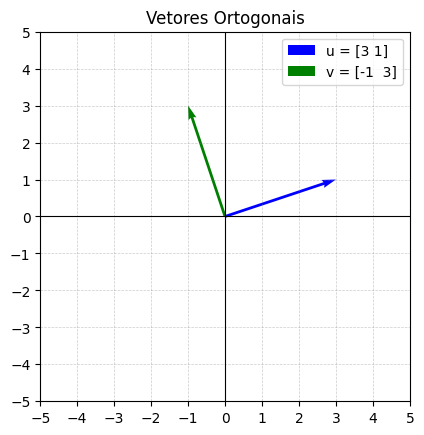


---
- Vetor u rotacionado: $\vec{u'}$ = $\begin{bmatrix} -1 \\ 3 \end{bmatrix}$
- Produto escalar $\vec{u'} \cdot \vec{v}$ = **10**
- Como o resultado é **diferente de zero**, os vetores **não são ortogonais** (são paralelos).



- Vetor $\vec{u}$ = $\begin{bmatrix} 3 \\ 1 \end{bmatrix}$ e $\vec{v}$ = $\begin{bmatrix} -1 \\ 3 \end{bmatrix}$
- Produto escalar $\vec{u} \cdot \vec{v}$ = **0**
- Como o resultado é **zero**, os vetores são **ortogonais**.


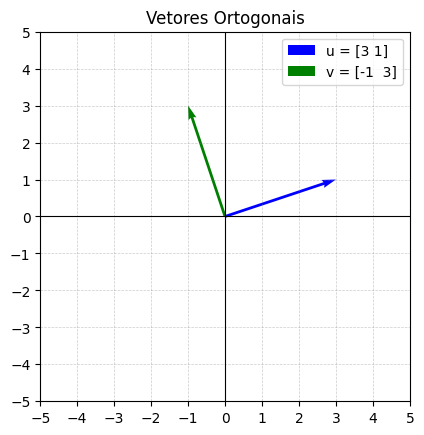


---
- Vetor u rotacionado: $\vec{u'}$ = $\begin{bmatrix} -1 \\ 3 \end{bmatrix}$
- Produto escalar $\vec{u'} \cdot \vec{v}$ = **10**
- Como o resultado é **diferente de zero**, os vetores **não são ortogonais** (são paralelos).


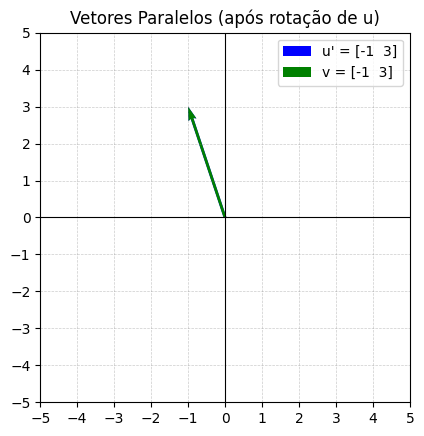

In [21]:
# Vetores para o teste
u = np.array([3, 1])
v = np.array([-1, 3])

# Produto escalar entre u e v
produto_escalar_uv = np.dot(u, v)

# Vamos rotacionar o vetor u 90 graus no sentido anti-horário para torná-lo paralelo a v
Rotacao_90_anti_horario = np.array([
    [0, -1],
    [1, 0]
])
u_rotacionado = Rotacao_90_anti_horario @ u
produto_escalar_urot_v = np.dot(u_rotacionado, v)


display(Markdown(f"""
- Vetor {vetor_para_latex('u', u)} e {vetor_para_latex('v', v)}
- Produto escalar $\\vec{{u}} \\cdot \\vec{{v}}$ = **{produto_escalar_uv}**
- Como o resultado é **zero**, os vetores são **ortogonais**.
"""))

plotar_vetores(
    titulo="Vetores Ortogonais",
    vetores=np.array([u, v]),
    cores=['blue', 'green'],
    labels=[f'u = {u}', f'v = {v}']
)

display(Markdown(f"""
---
- Vetor u rotacionado: {vetor_para_latex("u'", u_rotacionado)}
- Produto escalar $\\vec{{u'}} \\cdot \\vec{{v}}$ = **{produto_escalar_urot_v}**
- Como o resultado é **diferente de zero**, os vetores **não são ortogonais** (são paralelos).
"""))

plotar_vetores(
    titulo="Vetores Paralelos (após rotação de u)",
    vetores=np.array([u_rotacionado, v]),
    cores=['blue', 'green'],
    labels=[f"u' = {u_rotacionado}", f'v = {v}']
)